# Multiple Linear Regression
## Geely Auto Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit 
there and producing cars locally to give competition to their US and European counterparts. 

 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those 
may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Car dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
car = pd.read_csv("C:/Users/hp/Desktop/CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We will check for duplicate values in dataset

In [5]:
sum(car.duplicated(subset = 'car_ID')) == 0

True

We will check for NA values in dataset

In [6]:
print (car.isnull().values.any())

False


Inspect the various aspects of the car dataframe

In [7]:
car.shape

(205, 26)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [9]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

#### Creating Column 'CarCompany'  by spliting the 'CarName' coulmn for better analysis and then we will delete the 'CarName' coulmn for that is no longer useful for analysis

In [11]:
car1 = car["CarName"].str.split(" ", n = 0, expand = True) 
car["CarCompany"]= car1[0]  

In [12]:
car.CarCompany = car['CarCompany'].str.lower()
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Dropping the 'CarName' & 'Car_ID' column as they are not useful for analysis

In [13]:
car.drop(['CarName', 'car_ID'],axis=1,inplace=True)

After extracting CarCompany from the CarName, we can see that there are few discrepancies in the CarCompany name. We will replace wrong name with the correct one. 

In [14]:
car['CarCompany'].value_counts()

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
porcshce        1
mercury         1
toyouta         1
vokswagen       1
Name: CarCompany, dtype: int64

In [15]:
car['CarCompany'] = car['CarCompany'].str.replace('vw','volkswagen') 
car['CarCompany'] = car['CarCompany'].str.replace('vokswagen','volkswagen') 
car['CarCompany'] = car['CarCompany'].str.replace('toyouta','toyota') 
car['CarCompany'] = car['CarCompany'].str.replace('porcshce','porsche') 
car['CarCompany'] = car['CarCompany'].str.replace('maxda','mazda')

There are few discrepancies in the Fuelsystem and enginetype too. For example mfi is actually mpfi (Both acrym are same - (Multiple port fuel injection) and spdi should be spfi (Single port fuel injection). we will correct it.

In [16]:
car['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [17]:
car['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [18]:
car["fuelsystem"]=car["fuelsystem"].str.replace('mfi', 'mpfi')
car["fuelsystem"]=car["fuelsystem"].str.replace('spdi', 'spfi')
car["enginetype"]=car["enginetype"].str.replace('dohcv', 'dohc')

## Step 3: Data Preparation

### Dealing with Categorical Fields

#### We will  Generate dummy values for all 10 categorical variables. 

Note : We will generate dummy for variables which has 2 level instead for assigning binary values for the ease of understanding. 


In [19]:
car = pd.get_dummies(car, columns =['fuelsystem','doornumber','cylindernumber','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype', 'CarCompany'], drop_first = True)

In [20]:
car.shape

(205, 62)

In [21]:
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,...,0.087805,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,...,0.283704,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [22]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

car_train, car_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

We will use MinMax scaling for rescaling the variables so that they have a comparable scale. 

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

In [26]:
car_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


In [27]:
car_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [28]:
y_train = car_train.pop('price')
X_train = car_train

## Step 5: Building a linear model

we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             

# running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 23),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 5),
 ('horsepower', False, 26),
 ('peakrpm', True, 1),
 ('citympg', False, 13),
 ('highwaympg', True, 1),
 ('fuelsystem_2bbl', False, 24),
 ('fuelsystem_4bbl', False, 12),
 ('fuelsystem_idi', False, 4),
 ('fuelsystem_mpfi', False, 14),
 ('fuelsystem_spfi', False, 10),
 ('doornumber_two', False, 21),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 27),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('fueltype_gas', False, 3),
 ('aspiration_turbo', True, 1),
 ('carbody_hardtop', False, 7),
 ('carbody_hatchback', False, 6),
 ('carbody_sedan', False, 8),
 ('carbody_wagon', False, 9),
 ('drivewheel_fwd', False, 25),
 ('drivewheel

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'peakrpm', 'highwaympg',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'aspiration_turbo',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'CarCompany_bmw', 'CarCompany_dodge',
       'CarCompany_honda', 'CarCompany_mitsubishi', 'CarCompany_peugeot',
       'CarCompany_plymouth', 'CarCompany_porsche', 'CarCompany_saab',
       'CarCompany_subaru', 'CarCompany_volvo'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['symboling', 'compressionratio', 'horsepower', 'citympg',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spfi', 'doornumber_two',
       'cylindernumber_six', 'fueltype_gas', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcv',
       'CarCompany_audi', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_isuzu', 'CarCompany_jaguar', 'CarCompany_mazda',
       'CarCompany_mercury', 'CarCompany_nissan', 'CarCompany_renault',
       'CarCompany_toyota', 'CarCompany_volkswagen'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics


In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [37]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     114.9
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           9.20e-71
Time:                        00:19:33   Log-Likelihood:                 255.17
No. Observations:                 143   AIC:                            -454.3
Df Residuals:                     115   BIC:                            -371.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.36

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,cylindernumber_two,inf
13,cylindernumber_three,inf
29,CarCompany_subaru,inf
25,CarCompany_peugeot,inf
20,enginetype_rotor,inf
19,enginetype_ohcf,inf
18,enginetype_l,inf
17,enginelocation_rear,inf
0,const,208.160000
6,enginesize,50.960000


Since `cylindernumber_two` is insignificant (vif value inf) in presence of other variables; can be dropped

In [39]:
X_train_new = X_train_rfe.drop(["carlength"], axis = 1)

Rebuilding the model without `cylindernumber_two`

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [41]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.44e-71
Time:                        00:19:33   Log-Likelihood:                 254.48
No. Observations:                 143   AIC:                            -455.0
Df Residuals:                     116   BIC:                            -375.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.37

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,CarCompany_peugeot,inf
28,CarCompany_subaru,inf
19,enginetype_rotor,inf
18,enginetype_ohcf,inf
17,enginetype_l,inf
16,enginelocation_rear,inf
14,cylindernumber_two,inf
12,cylindernumber_three,inf
0,const,199.820000
5,enginesize,45.610000


Since `cylindernumber_twelve` is insignificant (P value 0.112) in presence of other variables; can be dropped

In [44]:
X_train_new = X_train_new.drop(["CarCompany_subaru"], axis = 1)

Rebuilding the model without `cylindernumber_twelve`

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [46]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.44e-71
Time:                        00:19:34   Log-Likelihood:                 254.48
No. Observations:                 143   AIC:                            -455.0
Df Residuals:                     116   BIC:                            -375.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.37

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,cylindernumber_two,inf
12,cylindernumber_three,inf
24,CarCompany_peugeot,inf
19,enginetype_rotor,inf
17,enginetype_l,inf
0,const,199.820000
5,enginesize,45.610000
4,curbweight,21.380000
11,cylindernumber_four,18.260000
6,boreratio,12.770000


Now that we have p value of all variables under 0.05, we will look for VIF value. We generally want a VIF that is less than 5. 

Since `curbweight` is insignificant (VIP value 8.64) in presence of other variables; can be dropped

In [49]:
X_train_new = X_train_new.drop(["wheelbase"], axis = 1)

Rebuilding the model without `curbweight`

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [51]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [52]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           5.16e-72
Time:                        00:19:35   Log-Likelihood:                 252.75
No. Observations:                 143   AIC:                            -453.5
Df Residuals:                     117   BIC:                            -376.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.39

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,CarCompany_peugeot,inf
18,enginetype_rotor,inf
16,enginetype_l,inf
13,cylindernumber_two,inf
11,cylindernumber_three,inf
0,const,194.140000
4,enginesize,45.610000
3,curbweight,20.570000
10,cylindernumber_four,18.250000
5,boreratio,12.750000


Since `carwidth` is insignificant (VIF value 3.16) in presence of other variables; can be dropped

In [54]:
X_train_new = X_train_new.drop(["carheight"], axis = 1)

Rebuilding the model without `carwidth`

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [56]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     123.9
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           3.00e-72
Time:                        00:19:36   Log-Likelihood:                 250.44
No. Observations:                 143   AIC:                            -450.9
Df Residuals:                     118   BIC:                            -376.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.41

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,CarCompany_peugeot,inf
17,enginetype_rotor,inf
15,enginetype_l,inf
12,cylindernumber_two,inf
10,cylindernumber_three,inf
0,const,183.140000
3,enginesize,42.160000
9,cylindernumber_four,18.220000
2,curbweight,17.580000
4,boreratio,12.630000


Since `boreratio` is insignificant (p value 0.727) in presence of other variables; can be dropped

In [59]:
X_train_new = X_train_new.drop(["CarCompany_peugeot"], axis = 1)

Rebuilding the model without `boreratio`

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [61]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [62]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     123.9
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           3.00e-72
Time:                        00:19:36   Log-Likelihood:                 250.44
No. Observations:                 143   AIC:                            -450.9
Df Residuals:                     118   BIC:                            -376.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.41

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,enginetype_rotor,inf
12,cylindernumber_two,inf
0,const,183.140000
3,enginesize,42.160000
9,cylindernumber_four,18.220000
2,curbweight,17.580000
4,boreratio,12.630000
1,carwidth,6.690000
7,highwaympg,4.780000
16,enginetype_ohcf,4.420000


Since `stroke` is insignificant (p value .649) in presence of other variables; can be dropped


In [64]:
X_train_new = X_train_new.drop(["enginetype_rotor"], axis = 1)


Rebuilding the model without `stroke`


In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


In [66]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


In [67]:
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     123.9
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           3.00e-72
Time:                        00:19:37   Log-Likelihood:                 250.44
No. Observations:                 143   AIC:                            -450.9
Df Residuals:                     118   BIC:                            -376.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.41

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,183.14
3,enginesize,42.16
9,cylindernumber_four,18.22
2,curbweight,17.58
4,boreratio,12.63
12,cylindernumber_two,7.79
1,carwidth,6.69
7,highwaympg,4.78
16,enginetype_ohcf,4.42
8,cylindernumber_five,3.80


Since `cylindernumber_three` is insignificant (p value 0.338) in presence of other variables; can be dropped

In [69]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)


Rebuilding the model without `cylindernumber_three`

In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [71]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [72]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     58.74
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           4.32e-54
Time:                        00:19:38   Log-Likelihood:                 196.69
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     119   BIC:                            -274.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,164.69
2,curbweight,14.02
8,cylindernumber_four,6.70
1,carwidth,6.47
3,boreratio,6.07
6,highwaympg,4.78
15,enginetype_ohcf,3.74
4,stroke,2.87
21,CarCompany_porsche,2.56
5,peakrpm,2.45


Since `enginelocation_rear` is insignificant (p value 0.236) in presence of other variables; can be dropped

In [74]:
X_train_new = X_train_new.drop(["CarCompany_honda"], axis = 1)


Rebuilding the model without `enginelocation_rear`


In [75]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [76]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


In [77]:
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     61.92
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           5.41e-55
Time:                        00:19:39   Log-Likelihood:                 196.69
No. Observations:                 143   AIC:                            -347.4
Df Residuals:                     120   BIC:                            -279.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [78]:
X_train_new = X_train_new.drop(["CarCompany_dodge"], axis = 1)








In [79]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


In [80]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model


In [81]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     65.40
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           6.63e-56
Time:                        00:19:39   Log-Likelihood:                 196.68
No. Observations:                 143   AIC:                            -349.4
Df Residuals:                     121   BIC:                            -284.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,152.80
2,curbweight,13.92
8,cylindernumber_four,6.49
1,carwidth,6.44
3,boreratio,5.53
6,highwaympg,4.76
15,enginetype_ohcf,3.39
19,CarCompany_porsche,2.54
4,stroke,2.49
14,enginetype_l,2.31


In [83]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     69.23
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           7.90e-57
Time:                        00:19:39   Log-Likelihood:                 196.67
No. Observations:                 143   AIC:                            -351.3
Df Residuals:                     122   BIC:                            -289.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [84]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,152.70
2,curbweight,11.35
1,carwidth,6.35
7,cylindernumber_four,4.64
5,highwaympg,4.61
3,stroke,2.46
14,enginetype_ohcf,2.36
13,enginetype_l,2.31
8,cylindernumber_three,2.05
12,enginelocation_rear,2.03


In [85]:
X_train_new = X_train_new.drop(["CarCompany_plymouth"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     73.46
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           9.18e-58
Time:                        00:19:40   Log-Likelihood:                 196.66
No. Observations:                 143   AIC:                            -353.3
Df Residuals:                     123   BIC:                            -294.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [86]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,152.69
2,curbweight,11.34
1,carwidth,6.32
7,cylindernumber_four,4.64
5,highwaympg,4.60
3,stroke,2.46
14,enginetype_ohcf,2.35
13,enginetype_l,2.31
8,cylindernumber_three,2.04
12,enginelocation_rear,2.03


In [87]:
X_train_new = X_train_new.drop(["CarCompany_saab"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     78.02
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.14e-58
Time:                        00:19:40   Log-Likelihood:                 196.54
No. Observations:                 143   AIC:                            -355.1
Df Residuals:                     124   BIC:                            -298.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.22

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,151.62
2,curbweight,11.13
1,carwidth,6.24
5,highwaympg,4.60
7,cylindernumber_four,4.31
3,stroke,2.30
14,enginetype_ohcf,2.23
13,enginetype_l,2.12
12,enginelocation_rear,1.99
17,CarCompany_porsche,1.97


In [89]:
X_train_new = X_train_new.drop(["cylindernumber_five"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     82.61
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.94e-59
Time:                        00:19:40   Log-Likelihood:                 196.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     125   BIC:                            -302.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [90]:
X_train_new = X_train_new.drop(["cylindernumber_four"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     88.10
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           2.58e-60
Time:                        00:19:40   Log-Likelihood:                 195.73
No. Observations:                 143   AIC:                            -357.5
Df Residuals:                     126   BIC:                            -307.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

In [91]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,113.80
2,curbweight,9.32
1,carwidth,5.16
5,highwaympg,4.55
3,stroke,2.28
12,enginetype_ohcf,2.16
4,peakrpm,1.85
15,CarCompany_porsche,1.85
10,enginelocation_rear,1.82
11,enginetype_l,1.58


In [92]:
X_train_new = X_train_new.drop(["cylindernumber_two"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     93.67
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           4.94e-61
Time:                        00:19:41   Log-Likelihood:                 194.99
No. Observations:                 143   AIC:                            -358.0
Df Residuals:                     127   BIC:                            -310.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [93]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,111.17
2,curbweight,9.07
1,carwidth,5.15
5,highwaympg,4.21
3,stroke,2.28
11,enginetype_ohcf,2.16
14,CarCompany_porsche,1.85
9,enginelocation_rear,1.82
4,peakrpm,1.81
10,enginetype_l,1.57


In [94]:
X_train_new = X_train_new.drop(["CarCompany_volvo"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     99.61
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.17e-61
Time:                        00:19:41   Log-Likelihood:                 193.99
No. Observations:                 143   AIC:                            -358.0
Df Residuals:                     128   BIC:                            -313.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.24

In [95]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,111.11
2,curbweight,8.95
1,carwidth,5.08
5,highwaympg,4.16
3,stroke,2.08
11,enginetype_ohcf,2.08
9,enginelocation_rear,1.81
14,CarCompany_porsche,1.80
4,peakrpm,1.79
10,enginetype_l,1.48


In [96]:
X_train_new = X_train_new.drop(["highwaympg"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.6
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           2.55e-62
Time:                        00:19:41   Log-Likelihood:                 193.05
No. Observations:                 143   AIC:                            -358.1
Df Residuals:                     129   BIC:                            -316.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [97]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.02
2,curbweight,5.18
1,carwidth,5.07
3,stroke,2.05
10,enginetype_ohcf,2.01
8,enginelocation_rear,1.81
13,CarCompany_porsche,1.76
9,enginetype_l,1.45
7,aspiration_turbo,1.38
4,peakrpm,1.30


In [98]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     115.5
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           3.54e-63
Time:                        00:19:41   Log-Likelihood:                 192.58
No. Observations:                 143   AIC:                            -359.2
Df Residuals:                     130   BIC:                            -320.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

In [99]:
X_train_new = X_train_new.drop(["aspiration_turbo"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           7.73e-64
Time:                        00:19:41   Log-Likelihood:                 191.56
No. Observations:                 143   AIC:                            -359.1
Df Residuals:                     131   BIC:                            -323.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

In [100]:
X_train_new = X_train_new.drop(["peakrpm"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.3
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           1.71e-64
Time:                        00:19:42   Log-Likelihood:                 190.49
No. Observations:                 143   AIC:                            -359.0
Df Residuals:                     132   BIC:                            -326.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.19

In [101]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.41
1,carwidth,4.89
2,curbweight,4.87
5,enginelocation_rear,1.71
10,CarCompany_porsche,1.67
6,enginetype_l,1.28
3,cylindernumber_three,1.24
7,enginetype_ohcf,1.11
4,cylindernumber_twelve,1.07
8,CarCompany_bmw,1.07


In [102]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     122.5
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           6.57e-60
Time:                        00:19:42   Log-Likelihood:                 176.33
No. Observations:                 143   AIC:                            -332.7
Df Residuals:                     133   BIC:                            -303.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

In [103]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.75
4,enginelocation_rear,1.59
9,CarCompany_porsche,1.53
1,curbweight,1.30
5,enginetype_l,1.28
2,cylindernumber_three,1.21
6,enginetype_ohcf,1.11
3,cylindernumber_twelve,1.07
7,CarCompany_bmw,1.06
8,CarCompany_mitsubishi,1.02


In [105]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [106]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginelocation_rear,1.60
8,CarCompany_porsche,1.56
0,curbweight,1.48
4,enginetype_l,1.33
1,cylindernumber_three,1.15
5,enginetype_ohcf,1.15
6,CarCompany_bmw,1.10
7,CarCompany_mitsubishi,1.05
2,cylindernumber_twelve,1.04


### Since the R square and Adjusted R square value in Final Model is almost same which is 0.840 and 0.835 respectively with low p value (<0.05) and low VIF value (<5), we are selecting this as our Final Model.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [107]:
y_train_price = lm.predict(X_train_lm)

In [108]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

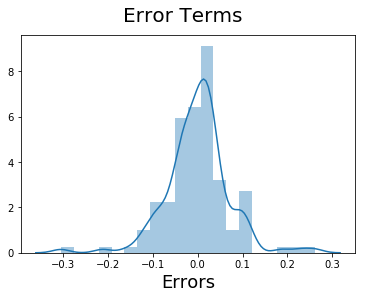

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7:  Making Predictions

#### Applying the scaling on the test sets

In [110]:
# Apply scaler() to all the columns except the 'dummy' variables on test dataset

num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

car_test[num_vars] = scaler.transform(car_test[num_vars])

#### Dividing into X_test and y_test

In [111]:
y_test = car_test.pop('price')
X_test = car_test

In [112]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [113]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 8:  Model Evaluation


In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
# Calculate RMSE (root-mean-square error)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

## Summary

We can see that the equation of our best fitted line is:

$ price = 1.167  \times  enginesize + 0.250  \times  enginetype_rotor + 0.205 \times CarCompany bmw + 0.210 \times    CarCompany porsche $

Conclusion

1.	The R square and Adjusted R square value in Final Model is almost same which is 0.840 and 0.835 respectively which indicates that none of the parameters in final model are reduntant.

2.	Error term is also normally distributed.

3.	The RMSE value is 0.08968889190774182

4.	As we can see that the model seems to be stable, The variables that can affect price are:

1) enginesize
2) CarCompany_bmw
3) enginetype_rotor
4) CarName_porsche


